<a href="https://colab.research.google.com/github/Danil-Kazakov/Data-HW10/blob/main/Data_HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Частина 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Завантаження даних

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

4422102/4422102 [==============================] - 1s 0us/step


Створення та навчання згорткової нейронної мережі

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/15
750/750 - 11s - loss: 0.8755 - accuracy: 0.6763 - val_loss: 0.5405 - val_accuracy: 0.8020 - 11s/epoch - 14ms/step
Epoch 2/15
750/750 - 3s - loss: 0.5763 - accuracy: 0.7943 - val_loss: 0.4495 - val_accuracy: 0.8356 - 3s/epoch - 4ms/step
Epoch 3/15
750/750 - 3s - loss: 0.5041 - accuracy: 0.8207 - val_loss: 0.4043 - val_accuracy: 0.8541 - 3s/epoch - 4ms/step
Epoch 4/15
750/750 - 3s - loss: 0.4618 - accuracy: 0.8341 - val_loss: 0.3718 - val_accuracy: 0.8614 - 3s/epoch - 4ms/step
Epoch 5/15
750/750 - 4s - loss: 0.4342 - accuracy: 0.8461 - val_loss: 0.3594 - val_accuracy: 0.8659 - 4s/epoch - 5ms/step
Epoch 6/15
750/750 - 3s - loss: 0.4094 - accuracy: 0.8537 - val_loss: 0.3333 - val_accuracy: 0.8765 - 3s/epoch - 4ms/step
Epoch 7/15
750/750 - 3s - loss: 0.3921 - accuracy: 0.8584 - val_loss: 0.3276 - val_accuracy: 0.8777 - 3s/epoch - 4ms/step
Epoch 8/15
750/750 - 3s - loss: 0.3825 - accuracy: 0.8621 - val_loss: 0.3184 - val_accuracy: 0.8811 - 3s/epoch - 5ms/step
Epoch 9/15
750/750 - 

Оцінка моделі

313/313 - 2s - loss: 0.3174 - accuracy: 0.8830 - 2s/epoch - 5ms/step
Test accuracy: 0.8830


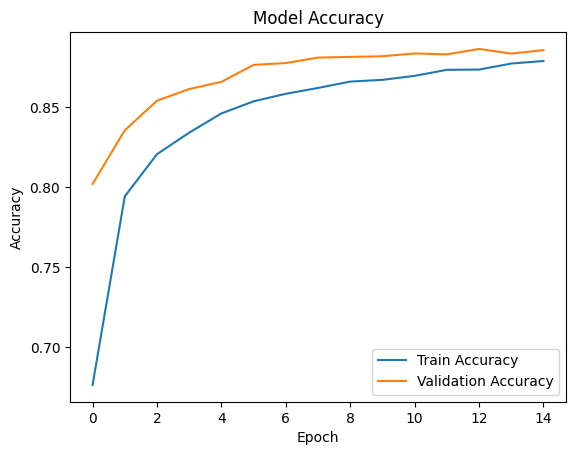

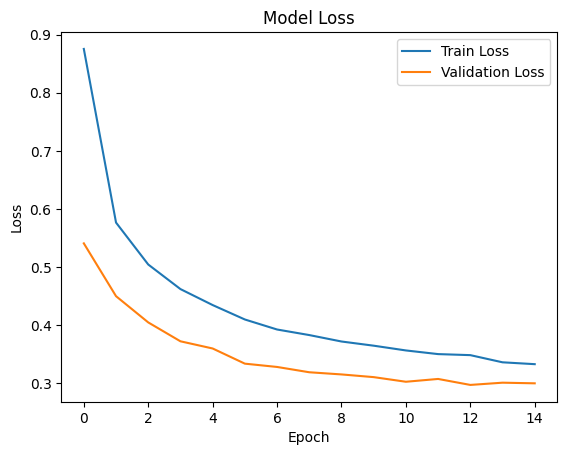

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

##Частина 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

Завантаження даних

In [13]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
x_test = np.repeat(x_test[..., np.newaxis], 3, -1)

x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Створення моделі з VGG16 як основою

In [14]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

Навчання моделі

In [15]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=20, validation_data=(x_test, y_test), verbose=2)


Epoch 1/20
938/938 - 65s - loss: 0.7229 - accuracy: 0.7400 - val_loss: 0.5503 - val_accuracy: 0.7978 - 65s/epoch - 69ms/step
Epoch 2/20
938/938 - 45s - loss: 0.5627 - accuracy: 0.7931 - val_loss: 0.4937 - val_accuracy: 0.8181 - 45s/epoch - 48ms/step
Epoch 3/20
938/938 - 45s - loss: 0.5247 - accuracy: 0.8053 - val_loss: 0.4595 - val_accuracy: 0.8271 - 45s/epoch - 48ms/step
Epoch 4/20
938/938 - 45s - loss: 0.5047 - accuracy: 0.8150 - val_loss: 0.4583 - val_accuracy: 0.8314 - 45s/epoch - 48ms/step
Epoch 5/20
938/938 - 45s - loss: 0.4879 - accuracy: 0.8192 - val_loss: 0.4358 - val_accuracy: 0.8378 - 45s/epoch - 48ms/step
Epoch 6/20
938/938 - 44s - loss: 0.4821 - accuracy: 0.8196 - val_loss: 0.4492 - val_accuracy: 0.8366 - 44s/epoch - 47ms/step
Epoch 7/20
938/938 - 44s - loss: 0.4729 - accuracy: 0.8224 - val_loss: 0.4303 - val_accuracy: 0.8439 - 44s/epoch - 47ms/step
Epoch 8/20
938/938 - 45s - loss: 0.4686 - accuracy: 0.8258 - val_loss: 0.4317 - val_accuracy: 0.8433 - 45s/epoch - 48ms/step


Оцінка моделі та порівняння з MLP

313/313 - 2s - loss: 0.4060 - accuracy: 0.8527 - 2s/epoch - 8ms/step
Test accuracy: 0.8527


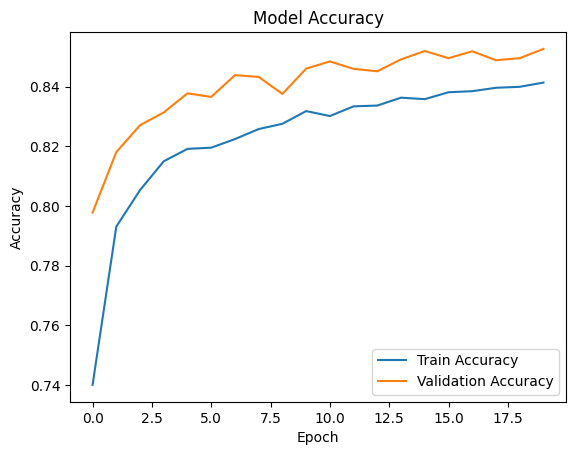

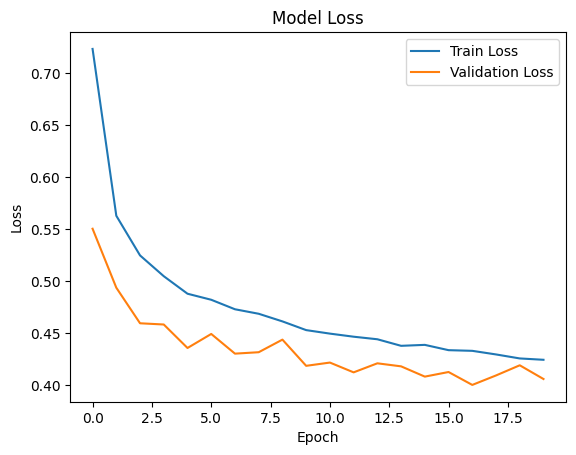

In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
